<a href="https://colab.research.google.com/github/tmarissa/Adv_DataAnalytics/blob/master/ipynb/503_K_Means_PCA_(cleansed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density, Real Estate, and Rural Percentage (FIPS Level)__<br><br>
This notebook:
- Real Estate Dataset with removed outliers
- Kmeans uses Average Listing Price (2019 and 2021), rural percentage (2010) and Density (2020)
- Kmeans for 2019 and 2021
    - FIPS
    - Individual State  
        - Arizona
        - Massachussets
        
References:<br>
https://github.com/knoppin1/DATA-606-Capstone
https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

In [1]:
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 1. Density and Real Estate

## 1.1 Read  CSV
- Load Density and Real Estate files that still contains outlier.
- Groupby FIPS and State



### 1.1a For the Year 2019

In [2]:
df_2019 = pd.read_csv('df_2019.csv', index_col = False)
df_2019.sample(5)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
6213,19185,2019,IA,Wayne County,12,130898.0,0.3802,0.5798,72400.0,0.0358,0.1584,100.000000,1,43.0
27510,55095,2019,WI,Polk County,49,278899.0,0.0059,0.0366,224950.0,-0.0002,-0.0110,85.465445,1,387.0
8850,20039,2019,KS,Decatur County,3,128313.0,-0.0127,0.2304,88000.0,-0.0222,0.1139,100.000000,1,15.0
22246,47149,2019,TN,Rutherford County,551,362029.0,0.0016,0.0604,329990.0,0.0018,0.0249,17.021447,2,1426.0
4777,13225,2019,GA,Peach County,186,181436.0,0.0061,0.0834,174950.0,0.1010,0.0941,38.223506,2,212.0


In [3]:
df_2019.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,30507.000000,30507.0,30507.000000,3.050700e+04,30475.000000,30402.000000,3.050700e+04,30475.000000,30402.000000,30507.000000,30507.000000,30507.000000
mean,30460.022585,2019.0,185.483364,2.509845e+05,0.007495,0.076221,1.959187e+05,0.010767,0.087112,60.047718,1.379126,393.214377
std,15115.862425,0.0,952.428290,1.355666e+05,0.127627,0.494169,9.545046e+04,0.198717,0.511591,30.177180,0.485178,992.919636
min,1001.000000,2019.0,0.000000,4.632000e+04,-0.939100,-0.990300,2.150000e+04,-0.905900,-0.975100,0.000000,1.000000,0.000000
25%,19003.000000,2019.0,16.000000,1.654610e+05,-0.021200,-0.039500,1.304290e+05,-0.022400,-0.033600,36.822160,1.000000,44.000000
50%,29167.000000,2019.0,40.000000,2.202060e+05,0.002200,0.039900,1.734000e+05,0.000000,0.045900,60.720947,1.000000,122.000000
75%,45079.000000,2019.0,99.000000,2.990315e+05,0.028600,0.132300,2.399000e+05,0.029950,0.138500,86.744724,2.000000,328.000000
max,56045.000000,2019.0,34979.000000,2.235543e+06,12.300000,39.000000,1.149000e+06,24.600000,39.000000,100.000000,2.000000,26147.000000


In [4]:
# Groupby FIPS
df_FIPS_2019 = df_2019.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2019.head(3)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
0,1001,AL,Autauga County,98,42.002162,2,244277.166667
1,1005,AL,Barbour County,28,67.789635,1,250540.000000
2,1007,AL,Bibb County,35,68.352607,1,177650.916667


In [5]:
df_FIPS_2019.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,2795.000000,2795.000000,2795.000000,2795.000000,2.795000e+03
mean,30491.929517,184.062612,60.659127,1.373166,2.523021e+05
std,15130.741479,936.309287,30.410925,0.483732,1.347981e+05
min,1001.000000,0.000000,0.000000,1.000000,6.579200e+04
25%,19016.000000,14.000000,36.968133,1.000000,1.664891e+05
50%,29179.000000,40.000000,61.379553,1.000000,2.214452e+05
75%,45088.000000,99.000000,90.111688,2.000000,3.001355e+05
max,56045.000000,34979.000000,100.000000,2.000000,2.022722e+06


### 1.1b For the Year 2021

In [6]:
df_2021 = pd.read_csv('df_2021.csv', index_col = False)
df_2021.head(3)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
0,4001,2021,AZ,Apache County,5,495914.0,-0.0197,0.1282,279000.0,-0.0016,-0.0571,74.061076,1,79.0
1,4001,2021,AZ,Apache County,5,491306.0,-0.0093,0.1099,276750.0,-0.0081,-0.0650,74.061076,1,76.0
2,4001,2021,AZ,Apache County,5,561300.0,0.1425,0.0189,279000.0,0.0081,-0.1143,74.061076,1,76.0


In [7]:
# Groupby FIPS
df_FIPS_2021 = df_2021.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2021.sample(3)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
297,12053,FL,Hernando County,411,19.375152,2,390561.083333
2668,53005,WA,Benton County,121,10.571022,2,540276.833333
662,18101,IN,Martin County,29,72.285659,1,202319.500000


In [8]:
df_FIPS_2021.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,2834.000000,2834.000000,2834.000000,2834.000000,2.834000e+03
mean,30439.770995,183.900141,60.434689,1.376147,3.154307e+05
std,15095.385032,709.060663,30.674572,0.484503,1.837992e+05
min,1001.000000,0.000000,0.000000,1.000000,4.500000e+04
25%,19017.500000,15.000000,36.419391,1.000000,1.960992e+05
50%,29158.000000,40.000000,61.272599,1.000000,2.742977e+05
75%,45084.500000,102.000000,90.388467,2.000000,3.809048e+05
max,56045.000000,15692.000000,100.000000,2.000000,2.273151e+06


# 2. K-means

## 2.1 FIPS

### 2.1a For the Year 2019

In [9]:
scaler = StandardScaler()
FIPS_2019 = df_FIPS_2019[["FIPS",'county', 'state', 'density', 'average_listing_price', 'rural_%', 'rural_cat']]
scale =scaler.fit_transform(FIPS_2019[['density', 'average_listing_price', 'rural_%']])
FIPS_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.091933,-0.059544,-0.613605
1,-0.166708,-0.013074,0.234514
2,-0.159231,-0.553899,0.253029
3,-0.099411,-0.169060,0.963391
4,-0.179527,0.060590,-0.305364


In [10]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_2019_scale)
pca_FIPS_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2019.head(5)

,principal_component1,principal_component2
0,0.279593,-0.013112
1,-0.241934,-0.110424
2,-0.555471,0.281303
3,-0.726470,0.037995
4,0.114261,-0.164535


### Determine Optimal Clusters (Elbow Method)

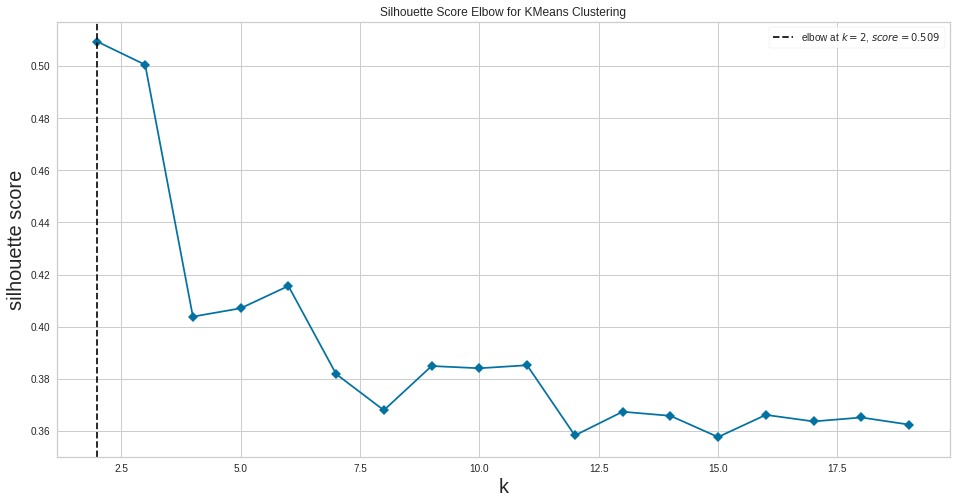

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False, s=30)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [12]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(pca_FIPS_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.4963249426511734
Silhouette score for k(clusters)= 4 is 0.3894652216183615
Silhouette score for k(clusters)= 5 is 0.3961036018552724
Silhouette score for k(clusters)= 6 is 0.4053779773688649
Silhouette score for k(clusters)= 7 is 0.3719172390379393
Silhouette score for k(clusters)= 8 is 0.36772972261161724
Silhouette score for k(clusters)= 9 is 0.3778676912812254
Silhouette score for k(clusters)= 10 is 0.3719142284850404
Silhouette score for k(clusters)= 11 is 0.3777334729569661
Silhouette score for k(clusters)= 12 is 0.34550193049330763
Silhouette score for k(clusters)= 13 is 0.36717007738655205
Silhouette score for k(clusters)= 14 is 0.3556125212892704


In [13]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [14]:
# Sum of Square errors 
kmeans.inertia_

679.659372467346

In [15]:
# No of iteration required to convergence
kmeans.n_iter_

21

In [16]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2019)
Counter(labels)

Counter({0: 401,
         1: 153,
         2: 1,
         3: 78,
         4: 4,
         5: 501,
         6: 31,
         7: 2,
         8: 642,
         9: 217,
         10: 765})

In [17]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
1,0,401
4,1,153
10,2,1
6,3,78
8,4,4
0,5,501
7,6,31
9,7,2
3,8,642
5,9,217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

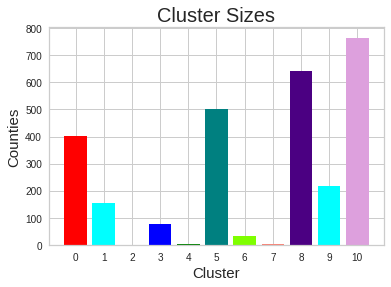

In [18]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [19]:
pca_FIPS_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-2.10606853e-01, -4.61514649e-01],
       [ 1.62598280e+00,  1.32590080e-01],
       [ 2.36323285e+01,  2.43482404e+01],
       [ 2.73985970e+00, -1.83758021e+00],
       [ 1.16228544e+01,  6.50462546e+00],
       [ 4.66108836e-01,  1.22236220e-02],
       [ 3.59848186e+00,  1.86421099e+00],
       [ 8.29036167e+00, -9.35357132e+00],
       [-1.16680834e+00,  3.26734533e-01],
       [ 9.95218121e-01, -1.07487923e+00],
       [-3.62268466e-01,  3.11558978e-01]])

In [20]:
# Look at outlier
pca_FIPS_2019[pca_FIPS_2019.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
274,10.959728,4.509162
1087,14.539249,3.665875
1578,12.357768,9.397232
2035,8.634672,8.446233


In [21]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2019)

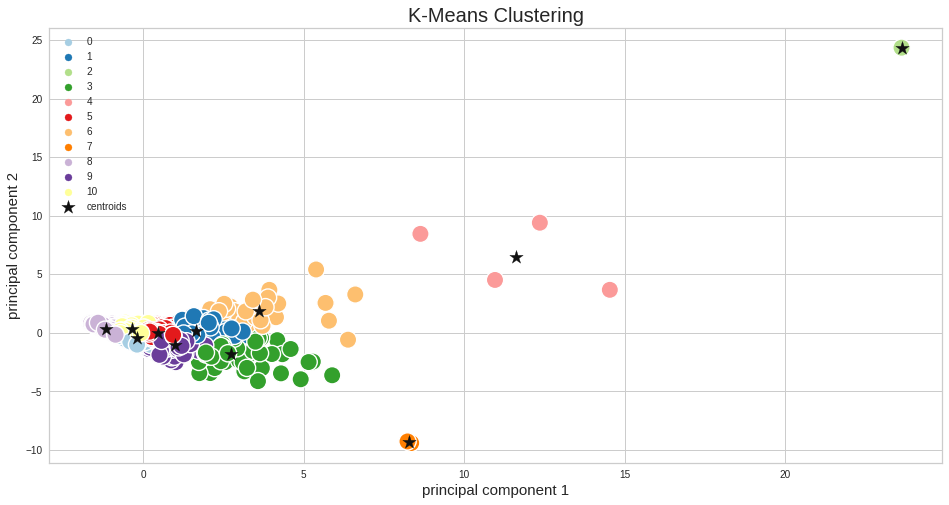

In [22]:

fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2019, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [23]:
pca_FIPS_2019.head(3)

,principal_component1,principal_component2,cluster
0,0.279593,-0.013112,5
1,-0.241934,-0.110424,0
2,-0.555471,0.281303,10


In [24]:
FIPS_2019.head(3)

,FIPS,county,state,density,average_listing_price,rural_%,rural_cat
0,1001,Autauga County,AL,98,244277.166667,42.002162,2
1,1005,Barbour County,AL,28,250540.000000,67.789635,1
2,1007,Bibb County,AL,35,177650.916667,68.352607,1


In [25]:
FIPS_2019['cluster']=pca_FIPS_2019['cluster']
FIPS_2019[['county','state', 'density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,density,average_listing_price,rural_%,cluster
0,Autauga County,AL,98,244277.166667,42.002162,5
1,Barbour County,AL,28,250540.000000,67.789635,0
2,Bibb County,AL,35,177650.916667,68.352607,10


In [26]:
FIPS_2019[(FIPS_2019['cluster']==8)]

,FIPS,county,state,density,average_listing_price,rural_%,rural_cat,cluster
5,1013,Butler County,AL,24,139720.750000,71.232157,1,8
10,1023,Choctaw County,AL,13,194982.857143,100.000000,1,8
12,1027,Clay County,AL,23,224328.166667,100.000000,1,8
16,1035,Conecuh County,AL,13,139800.727273,80.949501,1,8
18,1041,Crenshaw County,AL,21,153371.083333,100.000000,1,8
...,...,...,...,...,...,...,...,...
2738,55065,Lafayette County,WI,26,254438.583333,100.000000,1,8
2744,55077,Marquette County,WI,34,198162.666667,100.000000,1,8
2755,55099,Price County,WI,11,176344.600000,100.000000,1,8
2775,56003,Big Horn County,WY,3,252789.500000,100.000000,1,8


### Identifies the Cluster's Properties

In [27]:
for x in range(0,11):
  print("This is the FIPS 2019 cluster ", x, "\n", FIPS_2019[(FIPS_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the FIPS 2019 cluster  0 
           density  average_listing_price     rural_%  rural_cat
count  401.000000             401.000000  401.000000      401.0
mean    44.987531          318474.946485   81.272509        1.0
min      0.000000          233574.400000   52.511815        1.0
max    161.000000          473000.000000  100.000000        1.0 

This is the FIPS 2019 cluster  1 
            density  average_listing_price     rural_%  rural_cat
count   153.000000             153.000000  153.000000      153.0
mean    788.176471          316665.034232   10.233164        2.0
min     109.000000          161871.666667    0.000000        2.0
max    2003.000000          515130.750000   30.061845        2.0 

This is the FIPS 2019 cluster  2 
        density  average_listing_price   rural_%  rural_cat
count      1.0               1.000000  1.000000        1.0
mean   34979.0          564179.416667  0.002816        2.0
min    34979.0          564179.416667  0.002816        2.0
max    349

### 2.1b For the Year 2021

In [28]:
FIPS_2021 = df_FIPS_2021[['FIPS','county','density', 'state','average_listing_price', 'rural_%', 'rural_cat']]
scale = scaler.fit_transform(FIPS_2021[['density', 'average_listing_price', 'rural_%']])
FIPS_scale_2021 = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_scale_2021.sample(5)

,density,average_listing_price,rural_%
1286,0.252632,0.091897,-1.225653
563,-0.162074,-0.920736,-1.177551
921,0.057974,-0.232563,-1.089637
161,-0.243887,-0.296626,1.290068
2362,-0.255171,-0.764184,-0.103568


In [29]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_scale_2021)
pca_FIPS_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2021.head(5)

,principal_component1,principal_component2
0,0.215440,-0.254357
1,-0.341779,0.060836
2,-0.625092,-0.399178
3,-0.697706,0.287200
4,-0.504777,-0.884311


### Determine Optimal Clusters (Elbow Method)

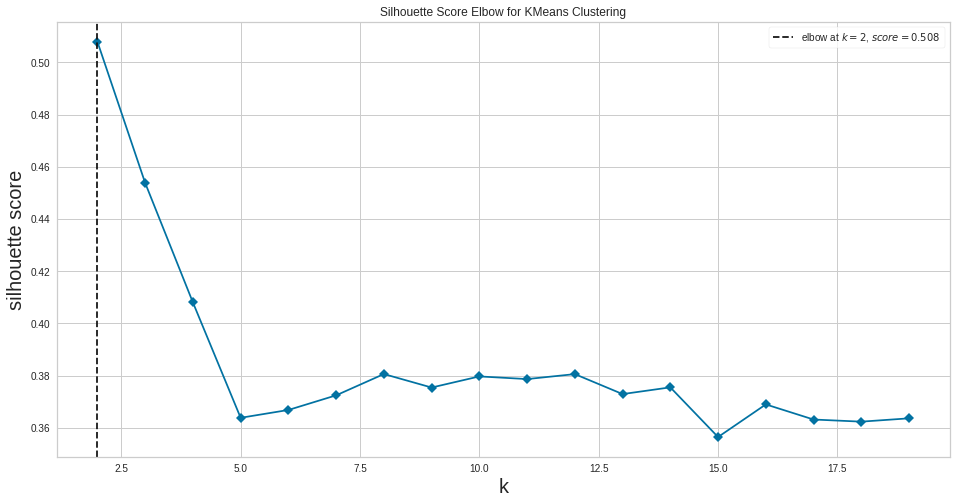

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [31]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_FIPS_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.4667729821806878
Silhouette score for k(clusters)= 4 is 0.41300795078498376
Silhouette score for k(clusters)= 5 is 0.37250228221756515
Silhouette score for k(clusters)= 6 is 0.36925929856907974
Silhouette score for k(clusters)= 7 is 0.37726542311534694
Silhouette score for k(clusters)= 8 is 0.3808065044804517
Silhouette score for k(clusters)= 9 is 0.3749961431521222
Silhouette score for k(clusters)= 10 is 0.37841387798785836
Silhouette score for k(clusters)= 11 is 0.3776756875875642
Silhouette score for k(clusters)= 12 is 0.3744613655500963
Silhouette score for k(clusters)= 13 is 0.37904267965452093
Silhouette score for k(clusters)= 14 is 0.3717952769554426


In [32]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [33]:
# Sum of Square errors 
kmeans.inertia_

877.1397005048359

In [34]:
# No. of iteration required to converge
kmeans.n_iter_

28

In [35]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2021)
Counter(labels)

Counter({0: 117,
         1: 518,
         2: 634,
         3: 38,
         4: 344,
         5: 5,
         6: 30,
         7: 142,
         8: 457,
         9: 393,
         10: 156})

In [36]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
7,0,117
3,1,518
1,2,634
9,3,38
4,4,344
10,5,5
8,6,30
6,7,142
2,8,457
0,9,393


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

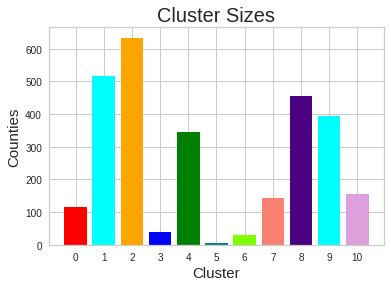

In [37]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [38]:
pca_FIPS_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 1.95228737,  1.1355253 ],
       [-1.27918388, -0.18918815],
       [-0.44047688, -0.40014607],
       [ 4.1895597 , -2.00573717],
       [ 0.59045585,  0.20146426],
       [13.2422673 , -5.76675224],
       [ 3.26515451,  3.77518375],
       [ 0.38247349,  1.75912052],
       [-0.50919598,  0.52709903],
       [ 0.25137974, -0.65335339],
       [ 1.68855793, -0.59608328]])

In [39]:
# Look at outlier
pca_FIPS_2021[pca_FIPS_2021.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
24,0.147203,0.062656
37,0.227676,-0.008221
39,0.962125,-0.016658
40,0.232269,0.264689
46,0.329157,0.264746
...,...,...
2823,0.242553,0.381450
2826,1.005294,0.232529
2827,0.936002,-0.063194
2831,0.302973,0.116912


In [40]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2021)

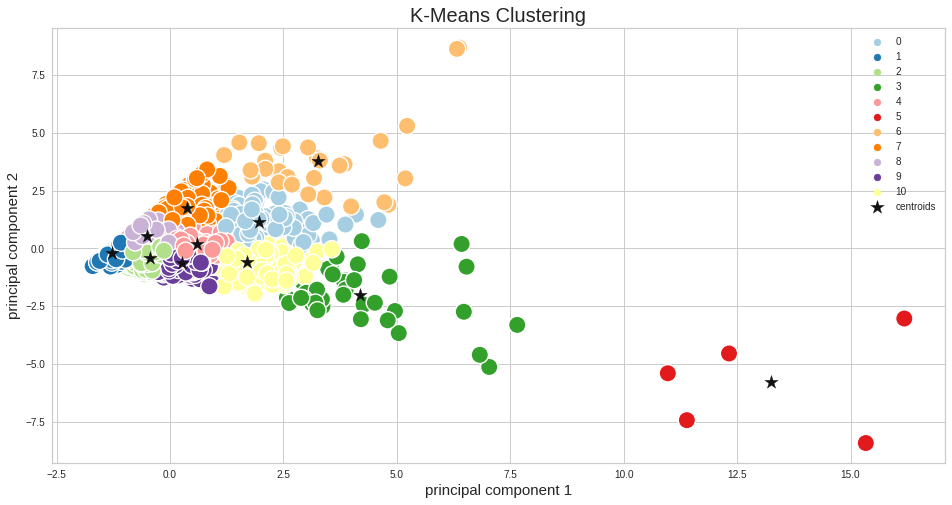

In [41]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2021, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [42]:
pca_FIPS_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.215440,-0.254357,9
1,-0.341779,0.060836,2
2,-0.625092,-0.399178,2


In [43]:
FIPS_2021['cluster']=pca_FIPS_2021['cluster']
FIPS_2021[['county', 'state', 'density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,state,density,average_listing_price,rural_%,cluster
0,Autauga County,AL,98,286362.666667,42.002162,9
1,Barbour County,AL,28,292979.750000,67.789635,2
2,Bibb County,AL,35,193595.583333,68.352607,2


In [44]:
FIPS_2021[(FIPS_2021['cluster']==7)]

,FIPS,county,density,state,average_listing_price,rural_%,rural_cat,cluster
86,4001,Apache County,5,AZ,626875.333333,74.061076,1,7
91,4011,Greenlee County,5,AZ,687275.666667,46.568686,2,7
92,4012,La Paz County,3,AZ,587637.666667,56.327786,1,7
95,4017,Navajo County,10,AZ,580345.916667,54.138242,1,7
171,6003,Alpine County,1,CA,523538.600000,100.000000,1,7
...,...,...,...,...,...,...,...,...
2686,53045,Mason County,68,WA,512130.916667,63.696272,1,7
2687,53047,Okanogan County,7,WA,644269.666667,79.987840,1,7
2689,53051,Pend Oreille County,9,WA,627687.142857,83.108992,1,7
2692,53059,Skamania County,7,WA,686915.600000,100.000000,1,7


### Identifies the Cluster's Properties

In [45]:
for x in range(0,11):
  print("This is the FIPS 2021 cluster ", x, "\n", FIPS_2021[(FIPS_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the FIPS 2021 cluster  0 
            density  average_listing_price     rural_%  rural_cat
count   117.000000             117.000000  117.000000      117.0
mean    370.444444          666833.753322   19.902511        2.0
min       7.000000          504610.833333    0.016933        2.0
max    2102.000000          953739.833333   49.900000        2.0 

This is the FIPS 2021 cluster  1 
          density  average_listing_price     rural_%  rural_cat
count  518.00000             518.000000  518.000000      518.0
mean    15.46332          176789.109523   97.832735        1.0
min      0.00000           45000.000000   75.240715        1.0
max    104.00000          280630.000000  100.000000        1.0 

This is the FIPS 2021 cluster  2 
           density  average_listing_price     rural_%   rural_cat
count  634.000000             634.000000  634.000000  634.000000
mean    43.615142          208191.003973   61.491950    1.116719
min      0.000000           77320.000000   39.936833    

In [46]:
FIPS_2021[(FIPS_2021['cluster']==4)]

,FIPS,county,density,state,average_listing_price,rural_%,rural_cat,cluster
24,1051,Elmore County,142,AL,335972.083333,54.188366,1,4
37,1077,Lauderdale County,140,AL,330298.333333,49.295106,2,4
39,1081,Lee County,286,AL,392050.750000,27.408717,2,4
40,1083,Limestone County,184,AL,378212.100000,57.609142,1,4
46,1095,Marshall County,172,AL,385386.750000,53.268687,1,4
...,...,...,...,...,...,...,...,...
2823,56013,Fremont County,4,WY,391933.818182,51.424370,1,4
2826,56021,Laramie County,37,WY,428054.200000,19.784604,2,4
2827,56025,Natrona County,14,WY,372003.636364,14.449304,2,4
2831,56041,Uinta County,9,WY,352368.750000,43.095937,2,4


## 2.2 Individual State - Arizona

### 2.2a For the Year 2019

In [47]:
AZ_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'AZ')]
AZ_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
86,4001,AZ,Apache County,5,74.061076,1,463216.250000
87,4003,AZ,Cochise County,20,36.301067,2,252562.333333
88,4005,AZ,Coconino County,7,31.466066,2,666891.166667
89,4007,AZ,Gila County,11,41.062000,2,471559.333333
90,4009,AZ,Graham County,8,46.437399,2,241557.583333
91,4011,AZ,Greenlee County,5,46.568686,2,239195.500000
92,4012,AZ,La Paz County,3,56.327786,1,315948.583333
93,4013,AZ,Maricopa County,480,2.363800,2,667522.250000
94,4015,AZ,Mohave County,16,22.963644,2,374457.583333
95,4017,AZ,Navajo County,10,54.138242,1,391470.833333


In [48]:
AZ_2019.shape

(15, 7)

In [49]:
scaler = StandardScaler()
scale =scaler.fit_transform(AZ_2019[['density', 'average_listing_price', 'rural_%']])
AZ_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.378135,2.094111
1,-0.319557,-1.100545,0.114922
2,-0.430831,1.807827,-0.138504
3,-0.396593,0.436699,0.364466
4,-0.422272,-1.177793,0.646218


In [50]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2019_scale)
pca_AZ_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2019.head(5)

,principal_component1,principal_component2
0,-1.301200,-1.592304
1,-0.820060,0.782015
2,0.692500,-1.391217
3,-0.251389,-0.598007
4,-1.228820,0.516832


### Determine Optimal Clusters (Elbow Method)

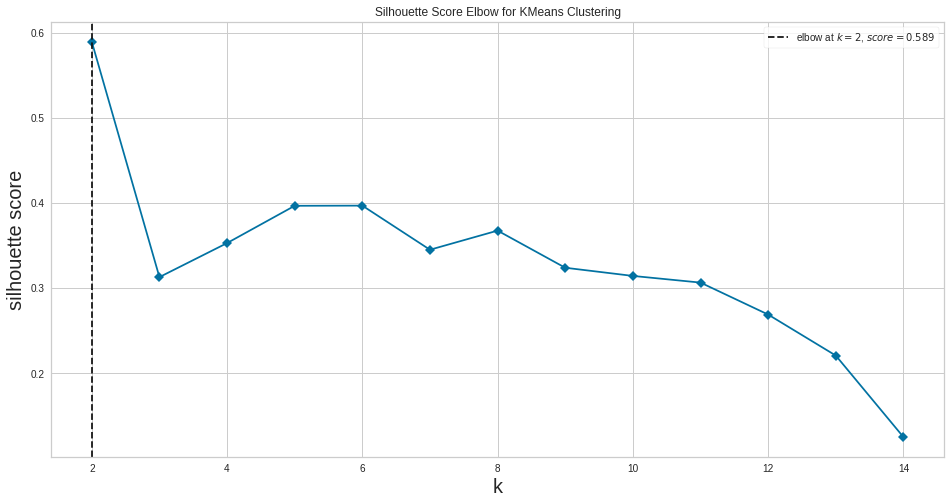

In [51]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [52]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5892476057423935
Silhouette score for k(clusters)= 3 is 0.3064813351391376
Silhouette score for k(clusters)= 4 is 0.3529238667247094
Silhouette score for k(clusters)= 5 is 0.3966856479235866
Silhouette score for k(clusters)= 6 is 0.39688501562520684
Silhouette score for k(clusters)= 7 is 0.3488268254071955
Silhouette score for k(clusters)= 8 is 0.3675558459327597
Silhouette score for k(clusters)= 9 is 0.3522824218155417


In [53]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [54]:
# Sum of Square Errors
kmeans.inertia_

4.221768719352836

In [55]:
# No. of iterator required to converge
kmeans.n_iter_

3

In [56]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2019)
Counter(labels)

Counter({0: 5, 1: 2, 2: 1, 3: 4, 4: 3})

In [57]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
4,0,5
2,1,2
3,2,1
0,3,4
1,4,3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

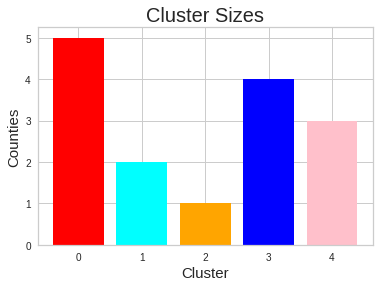

In [58]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [59]:
pca_AZ_2019['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.32096421,  0.76047776],
       [ 0.62925423, -1.2517045 ],
       [ 4.21661939, -0.15632806],
       [-0.94332264, -0.74133876],
       [-1.10221943,  0.60756777]])

In [60]:
# Look at outlier
pca_AZ_2019[pca_AZ_2019.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
8,-0.019613,0.516898
10,1.148038,0.807977
11,0.196130,0.865137
12,0.231427,0.014992
14,0.048839,1.597385


In [61]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2019)

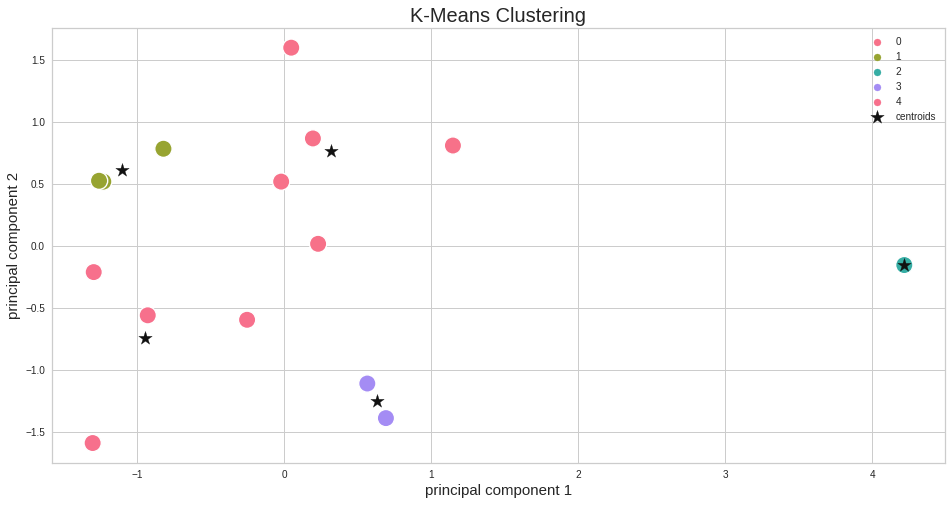

In [62]:
pca_AZ_2019['cluster']=km.labels_
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.show()

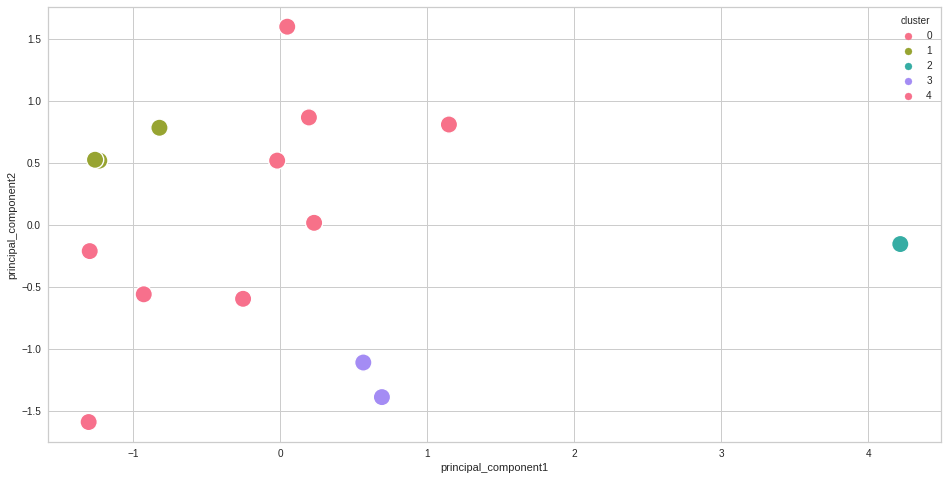

In [63]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [64]:
pca_AZ_2019.head(3)

,principal_component1,principal_component2,cluster
0,-1.30120,-1.592304,4
1,-0.82006,0.782015,1
2,0.69250,-1.391217,3


In [65]:
AZ_2019['county'].unique()

array(['Apache County', 'Cochise County', 'Coconino County',
       'Gila County', 'Graham County', 'Greenlee County', 'La Paz County',
       'Maricopa County', 'Mohave County', 'Navajo County', 'Pima County',
       'Pinal County', 'Santa Cruz County', 'Yavapai County',
       'Yuma County'], dtype=object)

In [66]:
AZ_2019['cluster']= labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
AZ_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

,county,density,average_listing_price,rural_%,cluster
86,Apache County,5,463216.250000,74.061076,3
87,Cochise County,20,252562.333333,36.301067,4
88,Coconino County,7,666891.166667,31.466066,1


In [68]:
AZ_2019[(AZ_2019['cluster']==2)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
93,4013,AZ,Maricopa County,480,2.3638,2,667522.25,2


In [69]:
AZ_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
86,4001,AZ,Apache County,5,74.061076,1,463216.250000,3
87,4003,AZ,Cochise County,20,36.301067,2,252562.333333,4
88,4005,AZ,Coconino County,7,31.466066,2,666891.166667,1
89,4007,AZ,Gila County,11,41.062000,2,471559.333333,3
90,4009,AZ,Graham County,8,46.437399,2,241557.583333,4
91,4011,AZ,Greenlee County,5,46.568686,2,239195.500000,4
92,4012,AZ,La Paz County,3,56.327786,1,315948.583333,3
93,4013,AZ,Maricopa County,480,2.363800,2,667522.250000,2
94,4015,AZ,Mohave County,16,22.963644,2,374457.583333,0
95,4017,AZ,Navajo County,10,54.138242,1,391470.833333,3


### Identifies the Cluster's Properties

In [70]:
for x in range(0,4):
  print("This is the Arizona 2019 cluster ", x, "\n", AZ_2019[(AZ_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the Arizona 2019 cluster  0 
        density    rural_%  rural_cat  average_listing_price
count      5.0   5.000000        5.0               5.000000
mean      56.4  17.940901        2.0          364066.500000
min       16.0   7.523491        2.0          254077.416667
max      113.0  26.883172        2.0          444905.083333 

This is the Arizona 2019 cluster  1 
        density    rural_%  rural_cat  average_listing_price
count      2.0   2.000000        2.0               2.000000
mean      18.0  32.331622        2.0          638418.416667
min        7.0  31.466066        2.0          609945.666667
max       29.0  33.197178        2.0          666891.166667 

This is the Arizona 2019 cluster  2 
        density  rural_%  rural_cat  average_listing_price
count      1.0   1.0000        1.0                   1.00
mean     480.0   2.3638        2.0              667522.25
min      480.0   2.3638        2.0              667522.25
max      480.0   2.3638        2.0              66

### 2.2b For the Year 2021

In [71]:
AZ_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'AZ')]
AZ_2021.shape

(15, 7)

In [72]:
scale =scaler.fit_transform(AZ_2021[['density', 'average_listing_price', 'rural_%']])
AZ_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.176940,2.094111
1,-0.319557,-1.069204,0.114922
2,-0.430831,1.654286,-0.138504
3,-0.396593,0.545960,0.364466
4,-0.422272,-1.606393,0.646218


In [73]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2021_scale)
pca_AZ_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2021.head(5)

,principal_component1,principal_component2
0,-1.611692,-1.046004
1,-0.606853,0.924118
2,0.255065,-1.425383
3,-0.360056,-0.640160
4,-1.174367,1.184367


### Determine Optimal Clusters (Elbow Method)

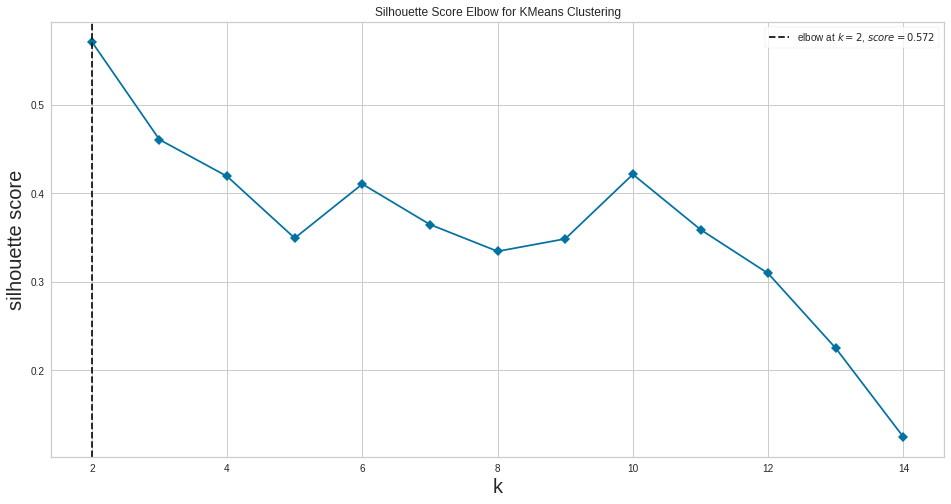

In [74]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig = plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [75]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5716510301888433
Silhouette score for k(clusters)= 3 is 0.46096565667065803
Silhouette score for k(clusters)= 4 is 0.41941563873919996
Silhouette score for k(clusters)= 5 is 0.3870170049976736
Silhouette score for k(clusters)= 6 is 0.41066479984059157
Silhouette score for k(clusters)= 7 is 0.3703882829980734
Silhouette score for k(clusters)= 8 is 0.348464898412162
Silhouette score for k(clusters)= 9 is 0.3486803708840085


In [76]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [77]:
# Sum of Square Errors
kmeans.inertia_

3.653849966346624

In [78]:
# No. of iteration required to converge
kmeans.n_iter_

2

In [79]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2021)
Counter(labels)

Counter({0: 2, 1: 3, 2: 1, 3: 4, 4: 5})

In [80]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
1,0,2
2,1,3
3,2,1
4,3,4
0,4,5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

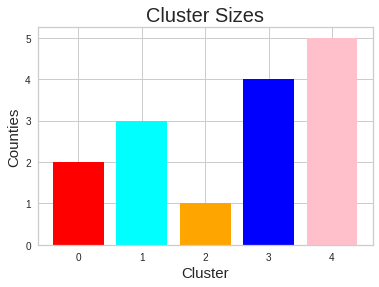

In [81]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [82]:
pca_AZ_2021['cluster'] = labels
kmeans.cluster_centers_

array([[-0.89060971,  1.05424289],
       [ 0.27575677, -1.03169847],
       [ 4.01367275, -0.54291181],
       [ 0.39436609,  1.19212075],
       [-0.9274376 , -0.64779231]])

In [83]:
# Look at outlier
pca_AZ_2021[pca_AZ_2021.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
1,-0.606853,0.924118
4,-1.174367,1.184367


In [84]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2021)

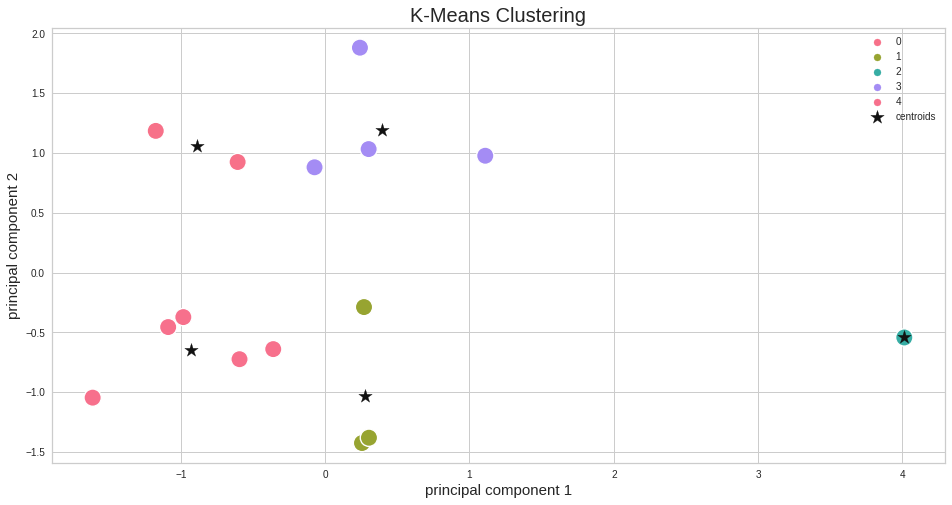

In [85]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

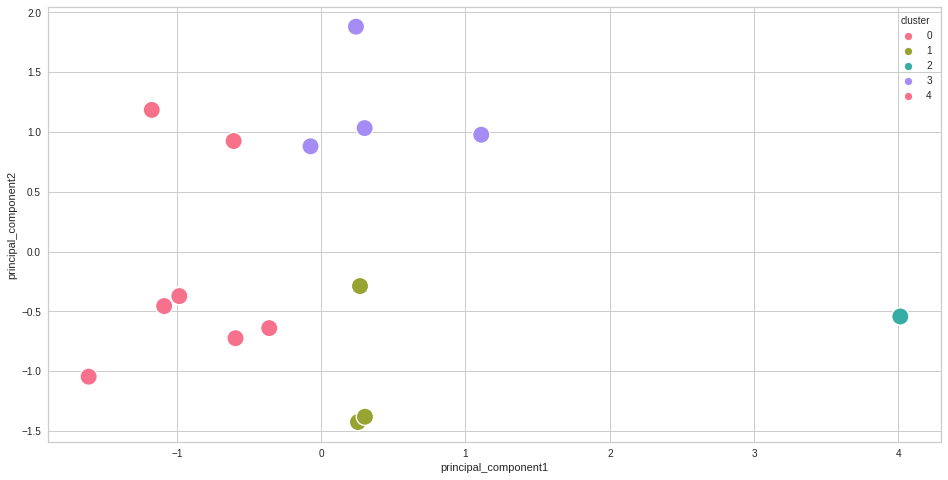

In [86]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [87]:
pca_AZ_2021.head(3)

,principal_component1,principal_component2,cluster
0,-1.611692,-1.046004,4
1,-0.606853,0.924118,0
2,0.255065,-1.425383,1


In [88]:
AZ_2021['cluster']=labels
AZ_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
86,Apache County,5,626875.333333,74.061076,4
87,Cochise County,20,396628.916667,36.301067,0
88,Coconino County,7,899840.000000,31.466066,1


In [89]:
AZ_2021[(AZ_2021['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
87,4003,AZ,Cochise County,20,36.301067,2,396628.916667,0
90,4009,AZ,Graham County,8,46.437399,2,297374.250000,0


In [90]:
AZ_2021

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
86,4001,AZ,Apache County,5,74.061076,1,626875.333333,4
87,4003,AZ,Cochise County,20,36.301067,2,396628.916667,0
88,4005,AZ,Coconino County,7,31.466066,2,899840.000000,1
89,4007,AZ,Gila County,11,41.062000,2,695058.083333,4
90,4009,AZ,Graham County,8,46.437399,2,297374.250000,0
91,4011,AZ,Greenlee County,5,46.568686,2,687275.666667,4
92,4012,AZ,La Paz County,3,56.327786,1,587637.666667,4
93,4013,AZ,Maricopa County,480,2.363800,2,833891.083333,2
94,4015,AZ,Mohave County,16,22.963644,2,467019.500000,3
95,4017,AZ,Navajo County,10,54.138242,1,580345.916667,4


### Identifies the Cluster's Properties

In [91]:
for x in range(0,4):
  print("This is the Arizona 2021 cluster ", x, "\n", AZ_2021[(AZ_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the Arizona 2021 cluster  0 
        density    rural_%  rural_cat  average_listing_price
count      2.0   2.000000        2.0               2.000000
mean      14.0  41.369233        2.0          347001.583333
min        8.0  36.301067        2.0          297374.250000
max       20.0  46.437399        2.0          396628.916667 

This is the Arizona 2021 cluster  1 
          density    rural_%  rural_cat  average_listing_price
count   3.000000   3.000000        3.0               3.000000
mean   24.666667  30.515472        2.0          822978.416667
min     7.000000  26.883172        2.0          687152.333333
max    38.000000  33.197178        2.0          899840.000000 

This is the Arizona 2021 cluster  2 
        density  rural_%  rural_cat  average_listing_price
count      1.0   1.0000        1.0               1.000000
mean     480.0   2.3638        2.0          833891.083333
min      480.0   2.3638        2.0          833891.083333
max      480.0   2.3638        2.0      

## 2.3 Individual State - Massachusetts

### 2.3a For the Year 2019

In [92]:
MA_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'MA')]

In [93]:
MA_2019.shape

(12, 7)

In [94]:
scaler = MinMaxScaler()
scale =scaler.fit_transform(MA_2019[['density', 'average_listing_price', 'rural_%']])
MA_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.565774,0.136300
1,0.002790,0.277720,0.579857
2,0.069452,0.143390,0.179556
3,0.113281,0.429690,0.076713
4,0.000000,0.024049,1.000000


In [95]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2019_scale)
pca_MA_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2019.head(5)

,principal_component1,principal_component2
0,0.163809,-0.121735
1,-0.278620,0.160658
2,-0.115381,-0.146826
3,0.149392,-0.150457
4,-0.670172,0.447665


### Determine Optimal Clusters (Elbow Method)

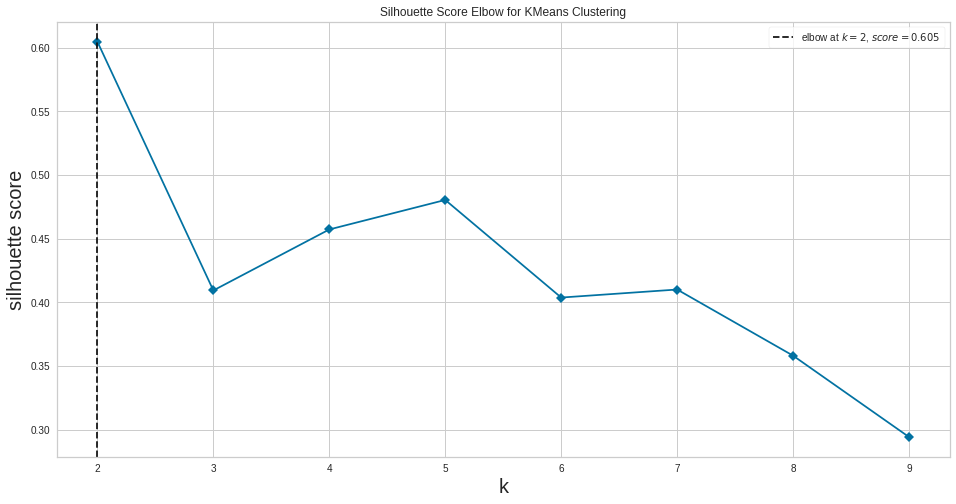

In [96]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2019)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [97]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.6046348317045515
Silhouette score for k(clusters)= 3 is 0.41317821170109265
Silhouette score for k(clusters)= 4 is 0.45718482263107246
Silhouette score for k(clusters)= 5 is 0.4622878746216099
Silhouette score for k(clusters)= 6 is 0.4037105804791017


In [98]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [99]:
# Sum of Square Errors
kmeans.inertia_

0.03751555692294817

In [100]:
# No. of iterator required to converge
kmeans.n_iter_

2

In [101]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2019)
Counter(labels)

Counter({0: 2, 1: 1, 2: 1, 3: 2, 4: 4, 5: 2})

In [102]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
2,0,2
5,1,1
3,2,1
1,3,2
0,4,4
4,5,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

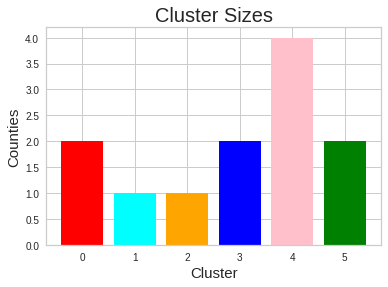

In [103]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [104]:
pca_MA_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-0.07230167, -0.13391688],
       [ 1.03896177,  0.4003524 ],
       [-0.67017177,  0.44766511],
       [-0.31345253,  0.11671372],
       [ 0.2137758 , -0.14017035],
       [-0.2261924 , -0.12646489]])

In [105]:
# Look at outlier
pca_MA_2019[pca_MA_2019.cluster==2][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
4,-0.670172,0.447665


In [106]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2019)

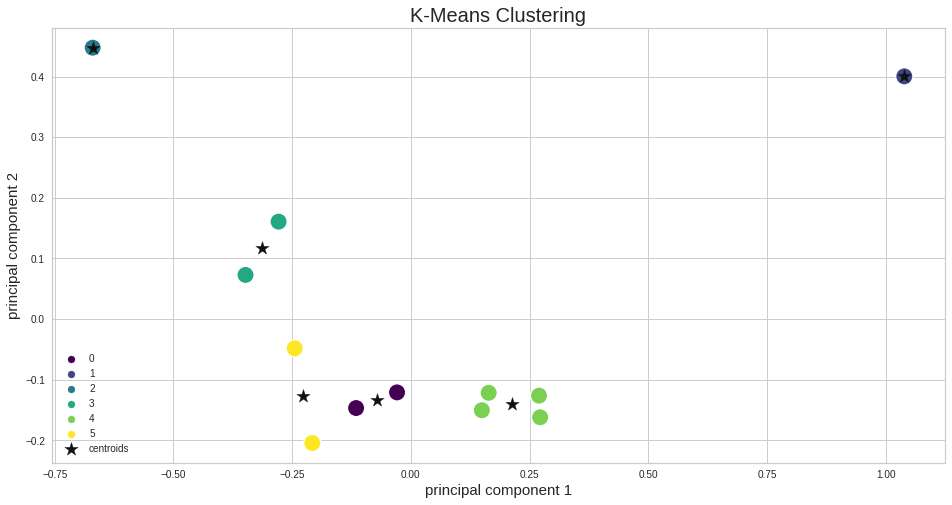

In [107]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

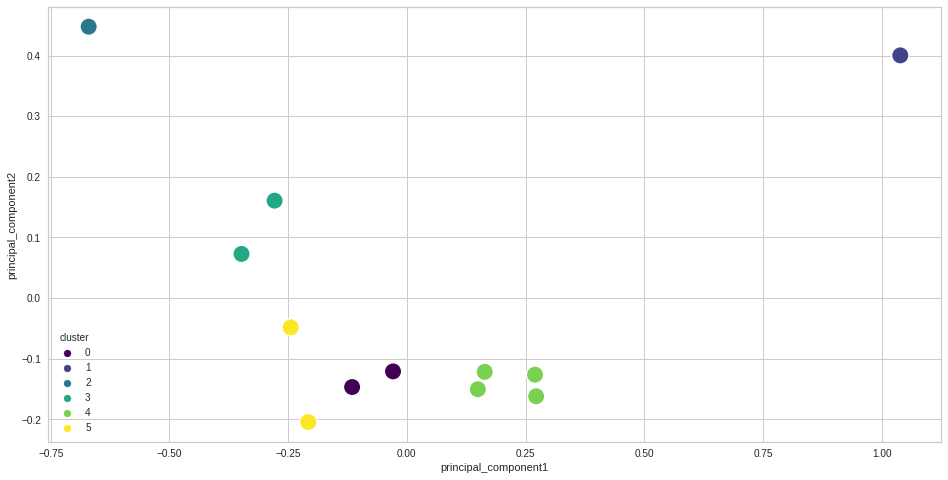

In [108]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [109]:
pca_MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   principal_component1  12 non-null     float64
 1   principal_component2  12 non-null     float64
 2   cluster               12 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 368.0 bytes


In [110]:
MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1077 to 1088
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   12 non-null     int64  
 1   state                  12 non-null     object 
 2   county                 12 non-null     object 
 3   density                12 non-null     int64  
 4   rural_%                12 non-null     float64
 5   rural_cat              12 non-null     int64  
 6   average_listing_price  12 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 768.0+ bytes


In [111]:
MA_2019['cluster']=labels
MA_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1077,Barnstable County,581,966429.416667,7.483047,4
1078,Berkshire County,139,631492.666667,31.593748,3
1079,Bristol County,1047,475299.666667,9.834302,0


In [112]:
MA_2019[(MA_2019['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1079,25005,MA,Bristol County,1047,9.834302,2,475299.666667,0
1086,25023,MA,Plymouth County,805,10.307747,2,654978.416667,0


In [113]:
MA_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1077,25001,MA,Barnstable County,581,7.483047,2,9.664294e+05,4
1078,25003,MA,Berkshire County,139,31.593748,2,6.314927e+05,3
1079,25005,MA,Bristol County,1047,9.834302,2,4.752997e+05,0
1080,25009,MA,Essex County,1644,4.244045,2,8.081962e+05,4
1081,25011,MA,Franklin County,101,54.431710,1,3.365358e+05,2
1082,25013,MA,Hampden County,754,8.570843,2,3.085722e+05,5
1083,25015,MA,Hampshire County,307,27.443699,2,4.216835e+05,3
1084,25017,MA,Middlesex County,1995,3.027706,2,9.772631e+05,4
1085,25021,MA,Norfolk County,1832,1.240489,2,9.615623e+05,4
1086,25023,MA,Plymouth County,805,10.307747,2,6.549784e+05,0


### Identifies the Cluster's Properties

In [114]:
for x in range(0,5):
  print("This is the Massachusetts 2019 cluster ", x, "\n", MA_2019[(MA_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the Massachusetts 2019 cluster  0 
        density    rural_%  rural_cat  average_listing_price
count      2.0   2.000000        2.0               2.000000
mean     926.0  10.071024        2.0          565139.041667
min      805.0   9.834302        2.0          475299.666667
max     1047.0  10.307747        2.0          654978.416667 

This is the Massachusetts 2019 cluster  1 
        density   rural_%  rural_cat  average_listing_price
count      1.0  1.000000        1.0           1.000000e+00
mean   13722.0  0.074091        2.0           1.471328e+06
min    13722.0  0.074091        2.0           1.471328e+06
max    13722.0  0.074091        2.0           1.471328e+06 

This is the Massachusetts 2019 cluster  2 
        density   rural_%  rural_cat  average_listing_price
count      1.0   1.00000        1.0                   1.00
mean     101.0  54.43171        1.0              336535.75
min      101.0  54.43171        1.0              336535.75
max      101.0  54.43171        1

### 2.3b For the Year 2021

In [115]:
MA_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'MA')]
MA_2021.shape

(12, 7)

In [116]:
scale =scaler.fit_transform(MA_2021[['density', 'average_listing_price', 'rural_%']])
MA_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.912252,0.136300
1,0.002790,0.496581,0.579857
2,0.069452,0.237933,0.179556
3,0.113281,0.465456,0.076713
4,0.000000,0.049693,1.000000


In [117]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2021_scale)
pca_MA_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2021.head(5)

,principal_component1,principal_component2
0,0.367718,-0.028177
1,-0.166281,0.213939
2,-0.102773,-0.151526
3,0.129774,-0.155334
4,-0.694705,0.443297


### Determine Optimal Clusters (Elbow Method)

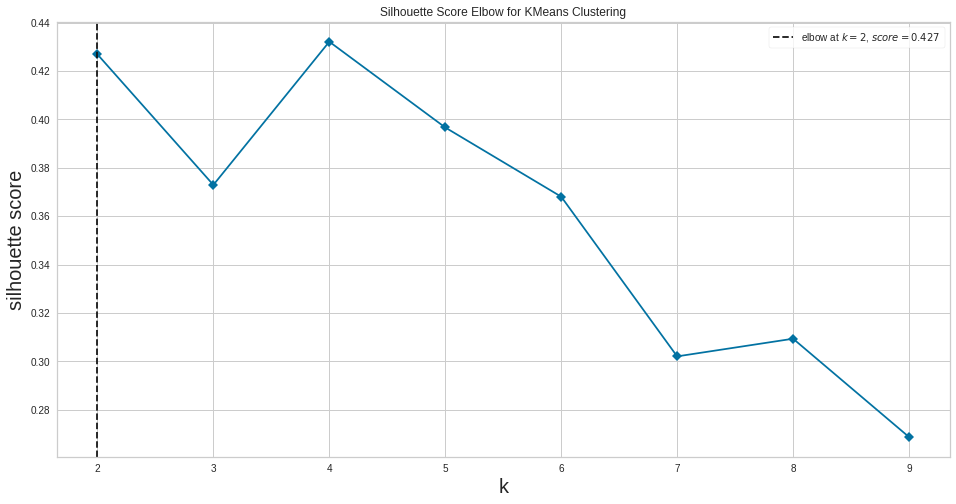

In [118]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2021)   # Fit the data to the visualizer
visualizer.ax.set_xlabel('Clusters', size=20)
visualizer.ax.set_ylabel('Silhouette Score', size=20)

visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [119]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.42691137280840374
Silhouette score for k(clusters)= 3 is 0.3729331080138208
Silhouette score for k(clusters)= 4 is 0.43213287544745466
Silhouette score for k(clusters)= 5 is 0.39667566797119
Silhouette score for k(clusters)= 6 is 0.3680727251459903


In [120]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [121]:
# Sum of Square Errors
kmeans.inertia_

0.08158423750928535

In [122]:
# No. of iteration required to converge
kmeans.n_iter_

2

In [123]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2021)
Counter(labels)

Counter({0: 4, 1: 2, 2: 1, 3: 3, 4: 1, 5: 1})

In [124]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,4
4,1,2
5,2,1
2,3,3
3,4,1
1,5,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

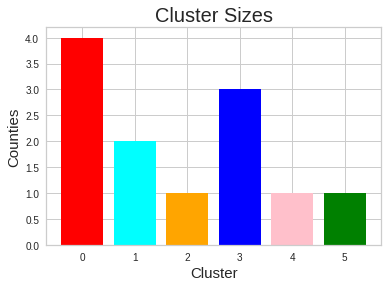

In [125]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [126]:
pca_MA_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.245197  , -0.1192016 ],
       [-0.33483139, -0.00661963],
       [ 0.98453515,  0.36218793],
       [-0.14489136, -0.1764593 ],
       [-0.694705  ,  0.44329703],
       [-0.16628127,  0.21393861]])

In [127]:
# Look at outlier
pca_MA_2021[pca_MA_2021.cluster==1][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
6,-0.371754,0.061725
11,-0.297909,-0.074965


In [128]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2021)

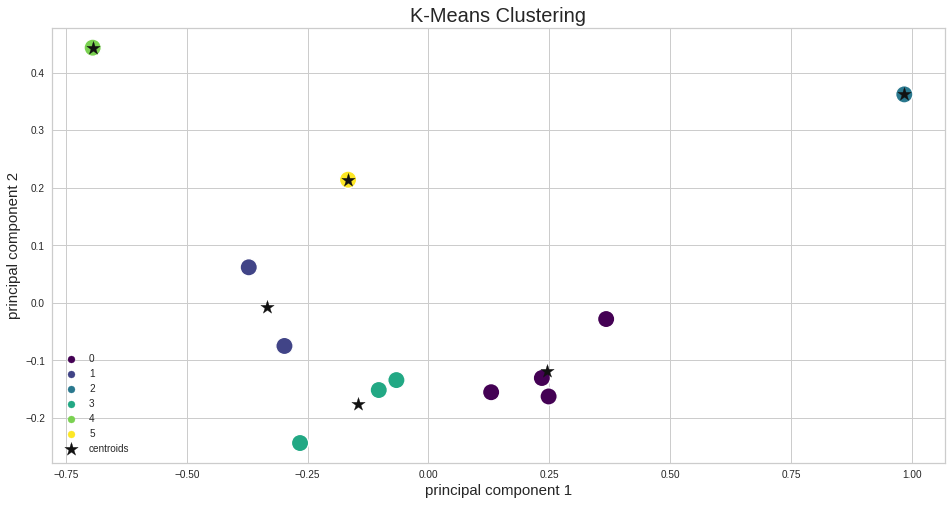

In [129]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.title('K-Means Clustering', size=20)
plt.xlabel('principal component 1', size=15)
plt.ylabel('principal component 2', size=15)
plt.legend()
plt.show()

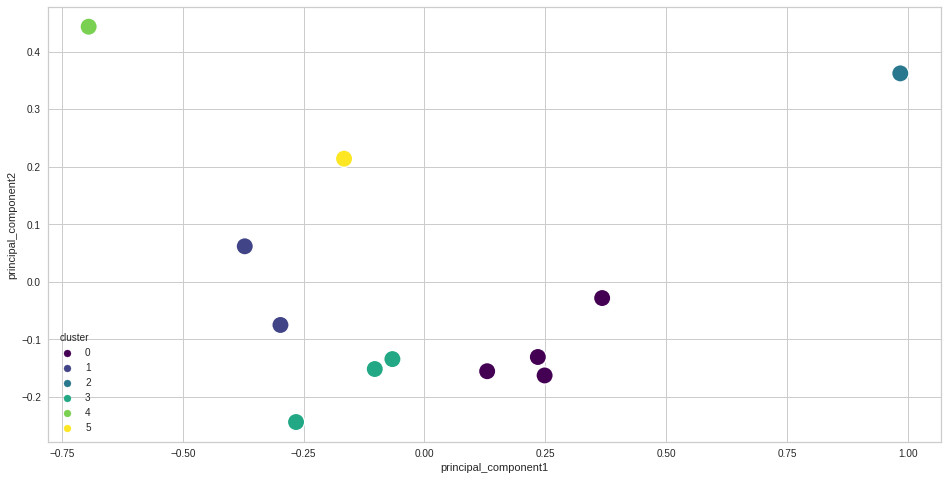

In [130]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [131]:
pca_MA_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.367718,-0.028177,0
1,-0.166281,0.213939,5
2,-0.102773,-0.151526,3


In [132]:
MA_2021['cluster']=labels
MA_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1102,Barnstable County,581,1.476872e+06,7.483047,0
1103,Berkshire County,139,9.752928e+05,31.593748,5
1104,Bristol County,1047,6.631889e+05,9.834302,3


In [133]:
MA_2021[(MA_2021['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1102,25001,MA,Barnstable County,581,7.483047,2,1.476872e+06,0
1105,25009,MA,Essex County,1644,4.244045,2,9.377348e+05,0
1109,25017,MA,Middlesex County,1995,3.027706,2,1.078144e+06,0
1110,25021,MA,Norfolk County,1832,1.240489,2,1.083184e+06,0


In [134]:
MA_2021

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1102,25001,MA,Barnstable County,581,7.483047,2,1.476872e+06,0
1103,25003,MA,Berkshire County,139,31.593748,2,9.752928e+05,5
1104,25005,MA,Bristol County,1047,9.834302,2,6.631889e+05,3
1105,25009,MA,Essex County,1644,4.244045,2,9.377348e+05,0
1106,25011,MA,Franklin County,101,54.431710,1,4.360453e+05,4
1107,25013,MA,Hampden County,754,8.570843,2,3.760823e+05,3
1108,25015,MA,Hampshire County,307,27.443699,2,5.355079e+05,1
1109,25017,MA,Middlesex County,1995,3.027706,2,1.078144e+06,0
1110,25021,MA,Norfolk County,1832,1.240489,2,1.083184e+06,0
1111,25023,MA,Plymouth County,805,10.307747,2,7.506079e+05,3


### Identifies the Cluster's Properties

In [135]:
for x in range(0,5):
  print("This is the Massachusetts 2021 cluster ", x, "\n", MA_2021[(MA_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['FIPS', 'cluster'], axis=1), '\n')

This is the Massachusetts 2021 cluster  0 
        density   rural_%  rural_cat  average_listing_price
count      4.0  4.000000        4.0           4.000000e+00
mean    1513.0  3.998822        2.0           1.143984e+06
min      581.0  1.240489        2.0           9.377348e+05
max     1995.0  7.483047        2.0           1.476872e+06 

This is the Massachusetts 2021 cluster  1 
        density    rural_%  rural_cat  average_listing_price
count      2.0   2.000000        2.0               2.000000
mean     438.5  22.916993        2.0          515761.791667
min      307.0  18.390286        2.0          496015.666667
max      570.0  27.443699        2.0          535507.916667 

This is the Massachusetts 2021 cluster  2 
        density   rural_%  rural_cat  average_listing_price
count      1.0  1.000000        1.0           1.000000e+00
mean   13722.0  0.074091        2.0           1.582755e+06
min    13722.0  0.074091        2.0           1.582755e+06
max    13722.0  0.074091        2

# 3. Save to CSV
PCA K-Means with cluster:
- FIPS - df_FIPS_2019.csv and df_FIPS_2021.csv
- Arizona - df_AZ_2019.csv and df_AZ_2021.csv
- Massachusetts - df_MA_2019.csv and df_MA_2021.csv

In [136]:
FIPS_2019.to_csv('df_FIPS_2019.csv', index=False)
FIPS_2021.to_csv('df_FIPS_2021.csv', index=False)
AZ_2019.to_csv('df_AZ_2019.csv', index=False)
AZ_2021.to_csv('df_AZ_2021.csv', index=False)
MA_2019.to_csv('df_MA_2019.csv', index=False)
MA_2021.to_csv('df_MA_2021.csv', index=False)